In [ ]:
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd '/content/gdrive/My Drive/Group_6_Project'

/content/gdrive/My Drive/Group_6_Project


In [ ]:
# Import csv file

df = pd.read_csv('./data/Impact_of_Mobile_Phone_on_Students_Health.csv')

In [ ]:
# Summary statistics
display(df)
print(df.describe())


,Names,Age,Gender,Mobile Phone,Mobile Operating System,Mobile phone use for education,Mobile phone activities,Helpful for studying,Educational Apps,Daily usages,Performance impact,Usage distraction,Attention span,Useful features,Health Risks,Beneficial subject,Usage symptoms,Symptom frequency,Health precautions,Health rating
0,Ali,21-25,Male,Yes,Android,Sometimes,Social Media,Yes,Educational Videos,4-6 hours,Agree,During Exams,Yes,Camera,Yes,Accounting,Headache,Never,Using Blue light filter,Excellent
1,Bilal,21-25,Male,Yes,Android,Sometimes,Social Media,Yes,Educational Videos,4-6 hours,Neutral,During Exams,Yes,Notes Taking App,Yes,Browsing Material,All of these,Sometimes,Taking Break during prolonged use,Good
2,Hammad,21-25,Male,Yes,IOS,Sometimes,All of these,Yes,Educational Videos,4-6 hours,Strongly agree,Not Distracting,No,Camera,Yes,Browsing Material,All of these,Sometimes,None of Above,Excellent
3,Abdullah,21-25,Male,Yes,Android,Frequently,All of these,Yes,Educational Videos,2-4 hours,Strongly agree,During Class Lectures,No,Internet Access,Only Partially,Reasarch,NaN,Never,Limiting Screen Time,Excellent
4,Waqar,21-25,Male,Yes,IOS,Frequently,All of these,Yes,Educational Videos,> 6 hours,Agree,While Studying,Yes,Internet Access,No,Browsing Material,Sleep disturbance,Sometimes,None of Above,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Zahoor,21-25,Male,Yes,IOS,Sometimes,All of these,Yes,Educational Videos,> 6 hours,Agree,During Exams,Yes,Internet Access,Yes,Reasarch,Headache,Sometimes,Taking Break during prolonged use,Excellent
96,Hafeez,16-20,Male,Yes,Android,Sometimes,Social Media,Yes,Educational Videos,4-6 hours,Strongly agree,During Class Lectures,No,Notes Taking App,No,Reasarch,Anxiety or Stress,Sometimes,Taking Break during prolonged use,Good
97,Babar,16-20,Male,Yes,Android,Sometimes,All of these,Yes,Educational Videos,2-4 hours,Agree,While Studying,No,Internet Access,No,Reasarch,Headache,Never,Limiting Screen Time,Excellent
98,Rizwan,16-20,Male,Yes,Android,Sometimes,All of these,Yes,Educational Videos,4-6 hours,Agree,During Exams,No,Internet Access,Yes,Reasarch,Headache,Rarely,Limiting Screen Time,Excellent;Good


       Names    Age Gender  Mobile Phone  Mobile Operating System   \
count    100    100     100           100                      100   
unique   100      4       2             1                        2   
top      Ali  21-25    Male           Yes                  Android   
freq       1     72      81           100                       81   

       Mobile phone use for education Mobile phone activities  \
count                              98                      99   
unique                              4                       7   
top                         Sometimes            All of these   
freq                               53                      59   

       Helpful for studying    Educational Apps Daily usages  \
count                    98                  98           99   
unique                    2                   4            4   
top                     Yes  Educational Videos    4-6 hours   
freq                     94                  54           40   

  

### Visualizing daily usage hours, and mobile phone activites

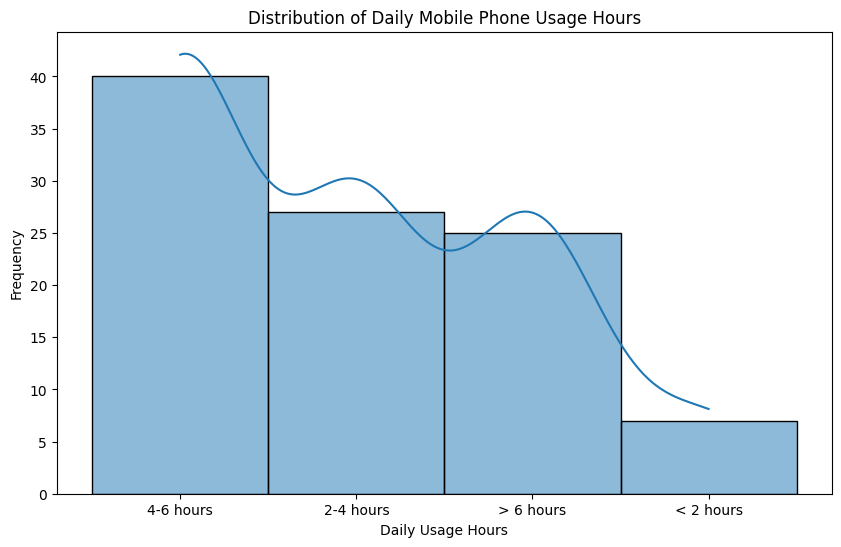

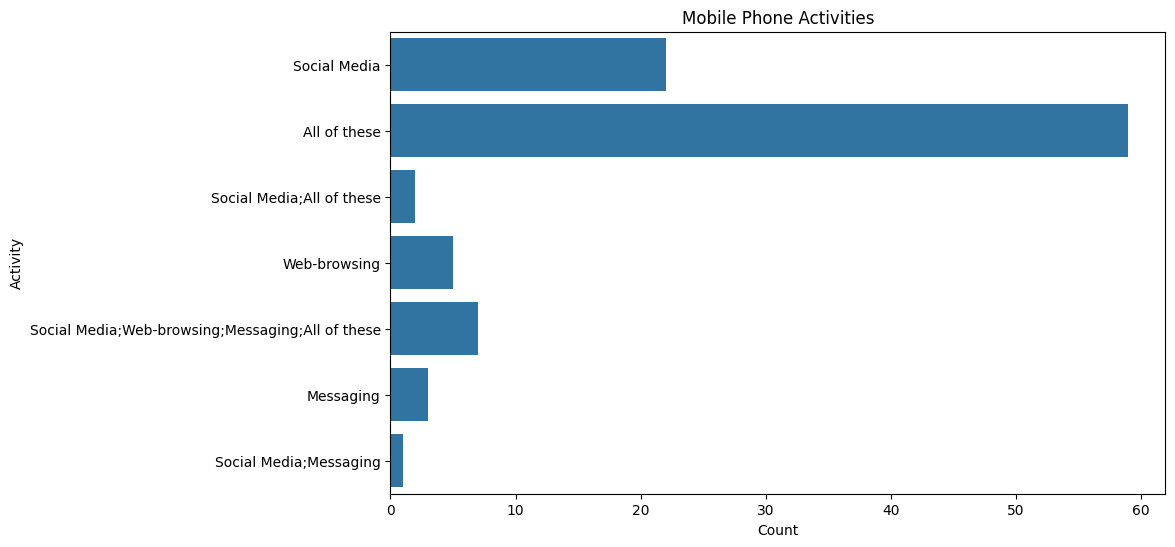

In [ ]:
# Distribution of daily usage hours
plt.figure(figsize=(10, 6))
sns.histplot(df['Daily usages'], bins=10, kde=True)
plt.title('Distribution of Daily Mobile Phone Usage Hours')
plt.xlabel('Daily Usage Hours')
plt.ylabel('Frequency')
plt.show()

# Mobile phone activities
plt.figure(figsize=(10, 6))
sns.countplot(y='Mobile phone activities', data=df)
plt.title('Mobile Phone Activities')
plt.xlabel('Count')
plt.ylabel('Activity')
plt.show()

### Data Preparation

In [ ]:
# Remove leading and trailing spaces from column names
df.columns = df.columns.str.strip()

# Drop rows with missing values
df = df.dropna()

# Convert age ranges to numerical values (midpoints)
def age_to_midpoint(age_range):
    if age_range == '16-20':
        return 18
    elif age_range == '21-25':
        return 23
    elif age_range == '26-30':
        return 28
    elif age_range == '31-35':
        return 33
    else:
        return None

df['Age'] = df['Age'].apply(age_to_midpoint)

# Print unique values in the 'Daily usage' column to identify all possible cases
print("Unique values in 'Daily usage' column before conversion:")
print(df['Daily usages'].unique())

# Convert 'Daily usage' to numerical values
def daily_usage_to_num(daily_usage):
    daily_usage = daily_usage.strip()  # Remove leading/trailing spaces
    if daily_usage == '< 2 hours':
        return 1
    elif daily_usage == '2-4 hours':
        return 2
    elif daily_usage == '4-6 hours':
        return 3
    elif daily_usage == '> 6 hours':
        return 4
    else:
        return None

df['Daily usages'] = df['Daily usages'].apply(daily_usage_to_num)

# Check if the conversion was successful
print("Sample data after conversion:")
print(df[['Age', 'Daily usages']].head())

# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Gender', 'Mobile Operating System', 'Mobile phone activities', 'Educational Apps'])

# List of numerical columns to be normalized
numerical_cols = ['Age', 'Daily usages']

# Check for any non-numeric values in the numerical columns
print("Non-numeric values in 'Age' and 'Daily usages' columns:")
print(df_encoded[numerical_cols].apply(pd.to_numeric, errors='coerce').isnull().sum())

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Display the first few rows of the normalized dataframe
print("Normalized DataFrame:")
display(df_encoded.head())

Unique values in 'Daily usage' column before conversion:
['4-6 hours' '> 6 hours' '2-4 hours' '< 2 hours']
Sample data after conversion:
   Age  Daily usages
0   23             3
1   23             3
2   23             3
4   23             4
5   23             4
Non-numeric values in 'Age' and 'Daily usages' columns:
Age             0
Daily usages    0
dtype: int64
Normalized DataFrame:


<ipython-input-149-feb37fa40993>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].apply(age_to_midpoint)
<ipython-input-149-feb37fa40993>:40: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Daily usages'] = df['Daily usages'].apply(daily_usage_to_num)


,Names,Age,Mobile Phone,Mobile phone use for education,Helpful for studying,Daily usages,Performance impact,Usage distraction,Attention span,Useful features,...,Mobile phone activities_Messaging,Mobile phone activities_Social Media,Mobile phone activities_Social Media;All of these,Mobile phone activities_Social Media;Messaging,Mobile phone activities_Social Media;Web-browsing;Messaging;All of these,Mobile phone activities_Web-browsing,Educational Apps_Educational Videos,Educational Apps_Language,Educational Apps_Productivity Tools,Educational Apps_Study Planner
0,Ali,0.056574,Yes,Sometimes,Yes,0.142294,Agree,During Exams,Yes,Camera,...,False,True,False,False,False,False,True,False,False,False
1,Bilal,0.056574,Yes,Sometimes,Yes,0.142294,Neutral,During Exams,Yes,Notes Taking App,...,False,True,False,False,False,False,True,False,False,False
2,Hammad,0.056574,Yes,Sometimes,Yes,0.142294,Strongly agree,Not Distracting,No,Camera,...,False,False,False,False,False,False,True,False,False,False
4,Waqar,0.056574,Yes,Frequently,Yes,1.319456,Agree,While Studying,Yes,Internet Access,...,False,False,False,False,False,False,True,False,False,False
5,Aammar,0.056574,Yes,Rarely,Yes,1.319456,Neutral,Not Distracting,Yes,Internet Access,...,False,False,False,False,False,False,True,False,False,False
